In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.8.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_csv("C:/Users/phuon/EDX/EPQDataAnalysis/_Extracted Data/files_combined.csv")
df = df.interpolate()
df.head()

,AX,AY,AZ,Activity
0,0.16,-0.95,-0.15,Walking
1,0.22,-0.95,-0.15,Walking
2,0.16,-0.96,-0.16,Walking
3,0.13,-0.96,-0.16,Walking
4,0.17,-0.98,-0.10,Walking


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481 entries, 0 to 1480
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AX        1481 non-null   float64
 1   AY        1481 non-null   float64
 2   AZ        1481 non-null   float64
 3   Activity  1481 non-null   object 
dtypes: float64(3), object(1)
memory usage: 46.4+ KB


In [5]:
activities = df['Activity'].value_counts().index
Fs = 5
df.index=pd.to_datetime(df.index,unit='ms')

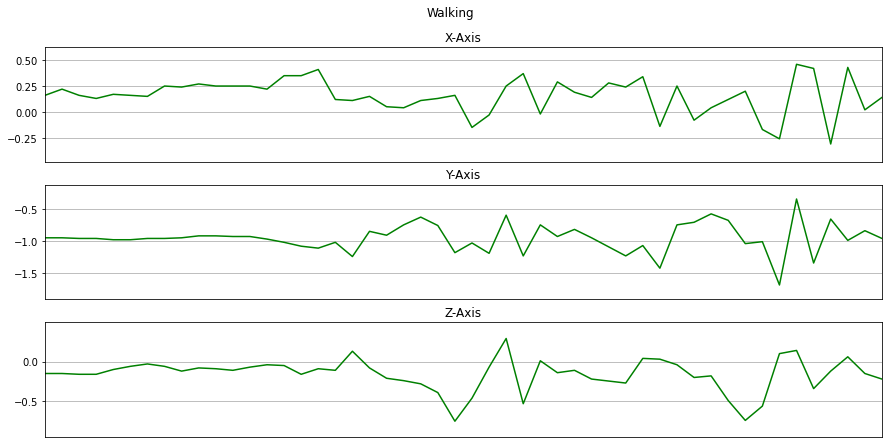

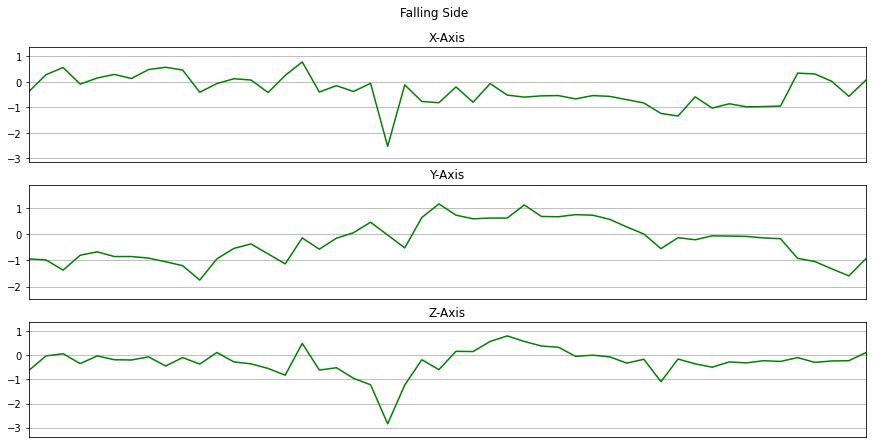

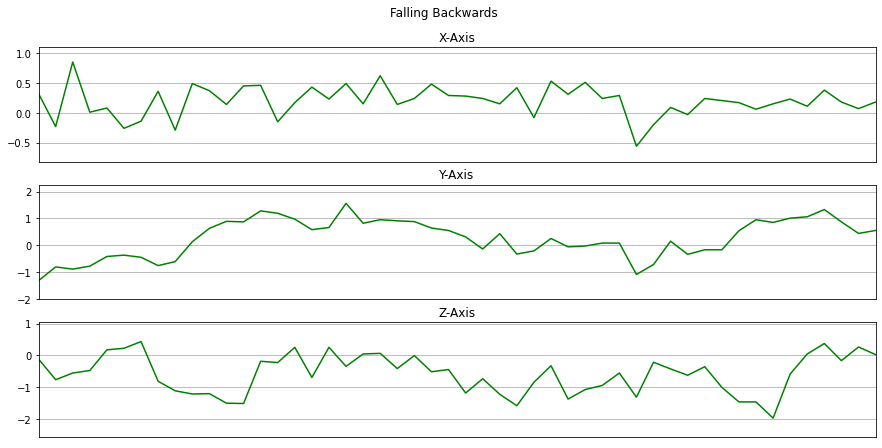

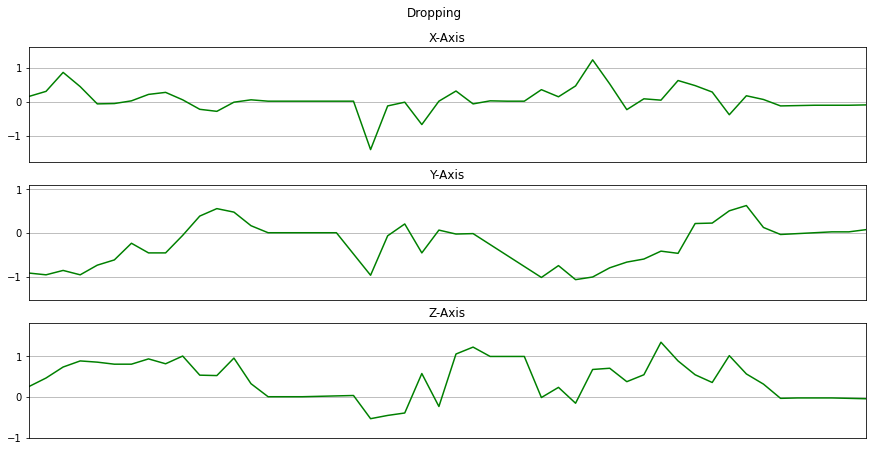

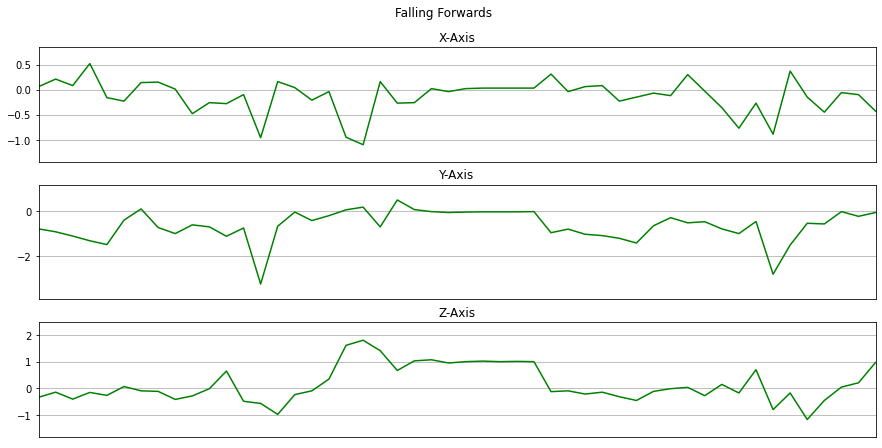

In [6]:
def plot_activity(activity, df):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(15, 7), sharex=True)
    plot_axis(ax0, df.index, df['AX'], 'X-Axis')
    plot_axis(ax1, df.index, df['AY'], 'Y-Axis')
    plot_axis(ax2, df.index, df['AZ'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = df[(df['Activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label = LabelEncoder()
df['Label'] = label.fit_transform(df['Activity'])
df.head()

,AX,AY,AZ,Activity,Label
1970-01-01 00:00:00.000,0.16,-0.95,-0.15,Walking,4
1970-01-01 00:00:00.001,0.22,-0.95,-0.15,Walking,4
1970-01-01 00:00:00.002,0.16,-0.96,-0.16,Walking,4
1970-01-01 00:00:00.003,0.13,-0.96,-0.16,Walking,4
1970-01-01 00:00:00.004,0.17,-0.98,-0.10,Walking,4


In [9]:
df = df.reset_index()
df.drop(["index"], axis=1, inplace=True)
df.head()

,AX,AY,AZ,Activity,Label
0,0.16,-0.95,-0.15,Walking,4
1,0.22,-0.95,-0.15,Walking,4
2,0.16,-0.96,-0.16,Walking,4
3,0.13,-0.96,-0.16,Walking,4
4,0.17,-0.98,-0.10,Walking,4


In [10]:
df['Activity'].value_counts()

Walking              825
Falling Side         185
Falling Backwards    165
Dropping             163
Falling Forwards     143
Name: Activity, dtype: int64

In [11]:
Walking = df[df['Activity']=='Walking'].head(143).copy()
Falling_Forward = df[df['Activity']=='Falling Forwards'].head(143).copy()
Falling_Backward = df[df['Activity']=='Falling Backwards'].head(143).copy()
Falling_Side = df[df['Activity']=='Falling Side'].head(143).copy()
Dropping = df[df['Activity']=='Dropping'].head(143).copy()

In [12]:
df = pd.DataFrame()
df = df.append([Walking, Falling_Forward, Falling_Backward, Falling_Side, Dropping])
df.shape

(715, 5)

In [13]:
X = df[["AX", "AY", "AZ"]]
y = df["Label"]

In [14]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ["AX", "AY", "AZ"])
scaled_X["label"] = y.values

scaled_X.dropna()
scaled_X.to_csv("C:/Users/phuon/EDX/EPQDataAnalysis/_Extracted Data/files_combined2.csv", index=False)

In [15]:
scaled_X["label"].value_counts()

4    143
2    143
1    143
3    143
0    143
Name: label, dtype: int64

In [16]:
import scipy.stats as stats

In [17]:
Fs = 5
frame_size = Fs*4 
hop_size = Fs

In [18]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['AX'].values[i: i + frame_size]
        y = df['AY'].values[i: i + frame_size]
        z = df['AZ'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [19]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [20]:
X.shape, y.shape

((139, 20, 3), (139,))

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y)

In [35]:
X_train.shape, X_test.shape

((104, 20, 3), (35, 20, 3))

In [23]:
X_train[1].shape, X_test[1].shape

((20, 3), (20, 3))

In [36]:
X_train = X_train.reshape(104, 20, 3, 1)
X_test = X_test.reshape(35, 20, 3, 1)

In [37]:
X_train[1].shape, X_test[1].shape

((20, 3, 1), (20, 3, 1))

In [38]:
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[1].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [39]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs = 30, validation_data= (X_test, y_test), verbose=1)

Epoch 1/30
4/4 [==============================] - 0s 42ms/step - loss: 1.7881 - accuracy: 0.2308 - val_loss: 1.7055 - val_accuracy: 0.3143
Epoch 2/30
4/4 [==============================] - 0s 10ms/step - loss: 1.6786 - accuracy: 0.3462 - val_loss: 1.6113 - val_accuracy: 0.4286
Epoch 3/30
4/4 [==============================] - 0s 10ms/step - loss: 1.5462 - accuracy: 0.4327 - val_loss: 1.5163 - val_accuracy: 0.4000
Epoch 4/30
4/4 [==============================] - 0s 9ms/step - loss: 1.4981 - accuracy: 0.4808 - val_loss: 1.4201 - val_accuracy: 0.4571
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 1.4010 - accuracy: 0.5577 - val_loss: 1.3194 - val_accuracy: 0.6000
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss: 1.2672 - accuracy: 0.5481 - val_loss: 1.2194 - val_accuracy: 0.6000
Epoch 7/30
4/4 [==============================] - 0s 9ms/step - loss: 1.1353 - accuracy: 0.5962 - val_loss: 1.1254 - val_accuracy: 0.5714
Epoch 8/30
4/4 [===============

In [41]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

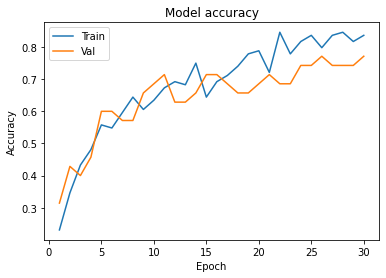

In [42]:
plot_learningCurve(history, 30)

In [43]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [44]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

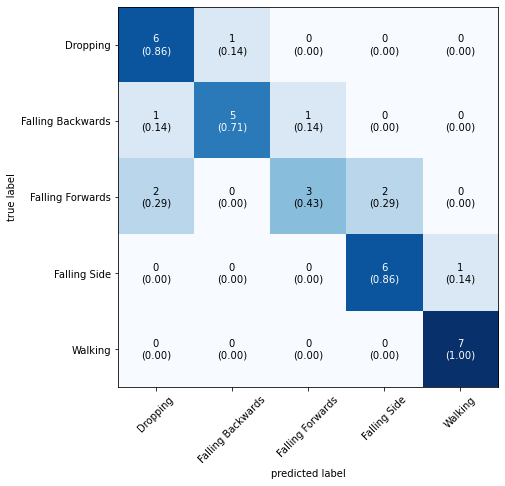

In [45]:
mat = confusion_matrix(y_test, classes_x)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(7,7))

In [ ]:
model.save_weights('model.h6')